<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-04-20 14:49:22--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  30.1MB/s    in 1.2s    

2023-04-20 14:49:25 (30.1 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn).head()


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn).head()

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


(array([2133., 1985., 1317., 1325.,  408.,  162.,  141.,  274.,  346.]),
 array([  25000,   50000,   75000,  100000,  150000,  200000,  300000,
         500000, 1000000, 2000000]),
 <BarContainer object of 9 artists>)

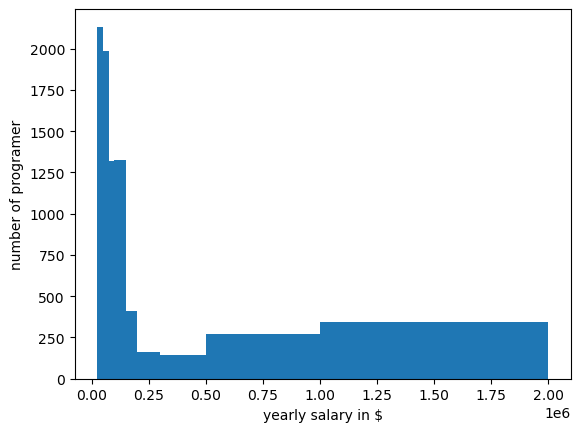

In [8]:
QUERY = """
SELECT ConvertedComp
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
plt.xlabel('yearly salary in $')
plt.ylabel('number of programer')
plt.hist(df,bins=[25000,50000,75000,100000,150000,200000,300000,500000,1000000,2000000])

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

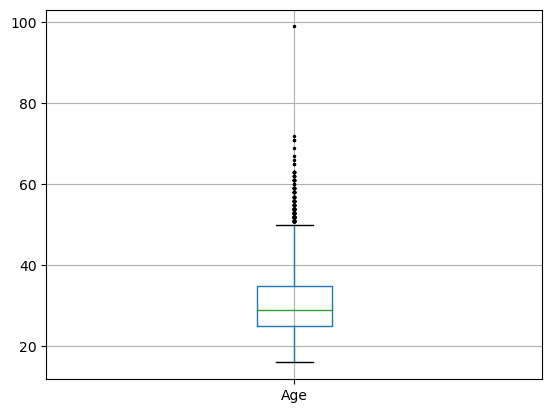

In [9]:
QUERY = """
SELECT Age
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)

flierprops = dict(marker='.', markerfacecolor='b', markersize=3,
                  linestyle='none', markeredgecolor='k')

df.boxplot(flierprops=flierprops)

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

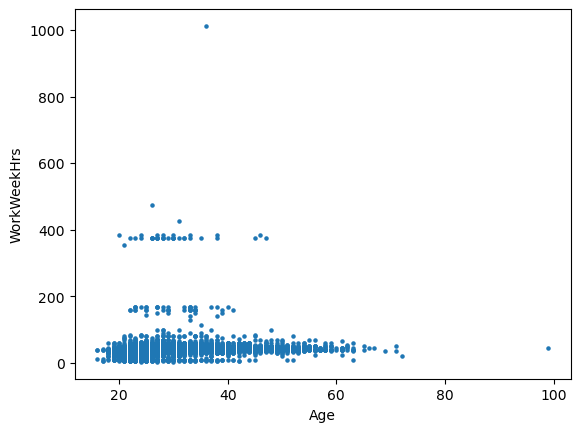

In [10]:
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)

df.plot.scatter(x='Age', y='WorkWeekHrs', s=5)

<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

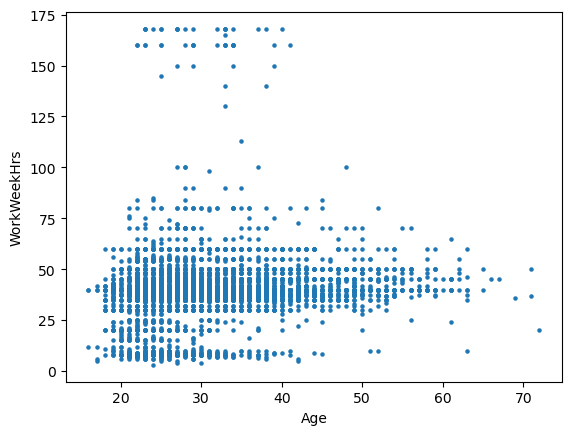

In [11]:
# without outliers or typos in survey
df[df[['Age','WorkWeekHrs']]<[80,200]].plot.scatter(x='Age', y='WorkWeekHrs', s=5)

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<AxesSubplot:xlabel='CodeRevHrs', ylabel='WorkWeekHrs'>

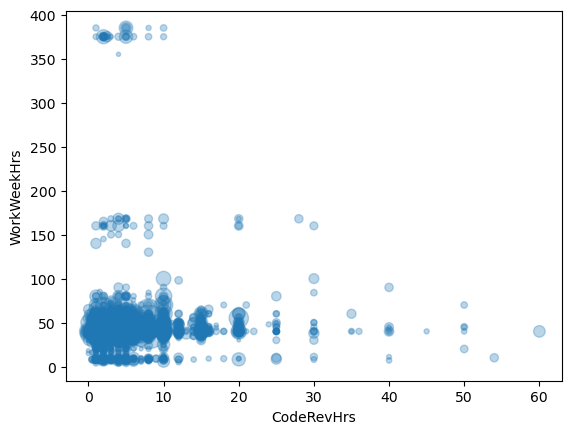

In [12]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df = df.dropna()
z = df['Age']/10
df[df[['CodeRevHrs','WorkWeekHrs']]<[80,400]].plot.scatter(x='CodeRevHrs', y='WorkWeekHrs', s=z**3, alpha=0.3)


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [62]:
QUERY = """
SELECT DatabaseDesireNextYear, count(*) as count
FROM DatabaseDesireNextYear
Group By DatabaseDesireNextYear
Order By count Desc
"""
df = pd.read_sql_query(QUERY,conn)
df

,DatabaseDesireNextYear,count
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856
5,Microsoft SQL Server,2706
6,SQLite,2437
7,Firebase,1650
8,MariaDB,1385
9,DynamoDB,1044


([<matplotlib.patches.Wedge at 0x7fa02fadbed0>,
 [Text(0.7824463936450666, 0.7731608119090295, 'PostgreSQL'),
  Text(-0.6615671034215538, 0.8788224892834817, 'MongoDB'),
  Text(-1.0401329412198714, -0.35794338182078445, 'Redis'),
  Text(-0.05354307165053029, -1.098696108793613, 'MySQL'),
  Text(0.957712503574976, -0.5410977365468754, 'Elasticsearch')],
 [Text(0.4267889419882181, 0.42172407922310695, '24.8%'),
  Text(-0.3608547836844838, 0.47935772142735356, '20.9%'),
  Text(-0.5673452406653843, -0.19524184462951877, '19.1%'),
  Text(-0.029205311809380154, -0.5992887866146979, '18.8%'),
  Text(0.5223886383136233, -0.2951442199346593, '16.4%')])

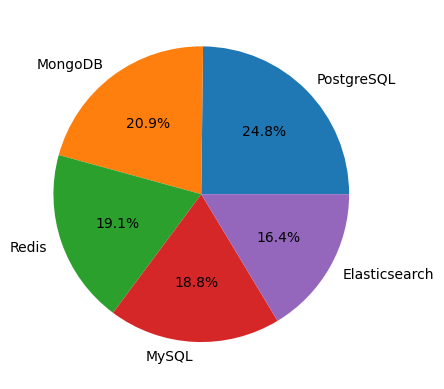

In [13]:
QUERY = """
SELECT DatabaseDesireNextYear, count(*) as count
FROM DatabaseDesireNextYear
Group By DatabaseDesireNextYear
Order By count Desc
"""
df = pd.read_sql_query(QUERY,conn)

mylabels = list(df.head()['DatabaseDesireNextYear'])

summe = df.head()['count'].sum()

df['pers']=round(df['count']/summe*100,2)
sizes = list(df['pers'].head())

plt.pie(sizes, labels=mylabels,autopct='%1.1f%%')

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<AxesSubplot:xlabel='Age'>

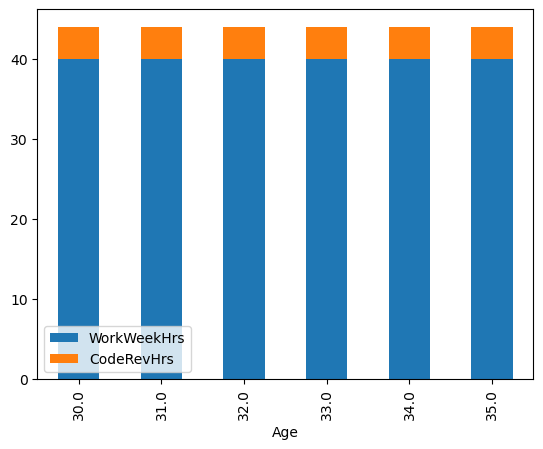

In [54]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
Where Age Between 30 And 35
"""
df = pd.read_sql_query(QUERY,conn)

df = df.groupby(['Age'])[['WorkWeekHrs','CodeRevHrs']].median()
df.plot(kind = 'bar', stacked = True )


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<AxesSubplot:xlabel='Age'>

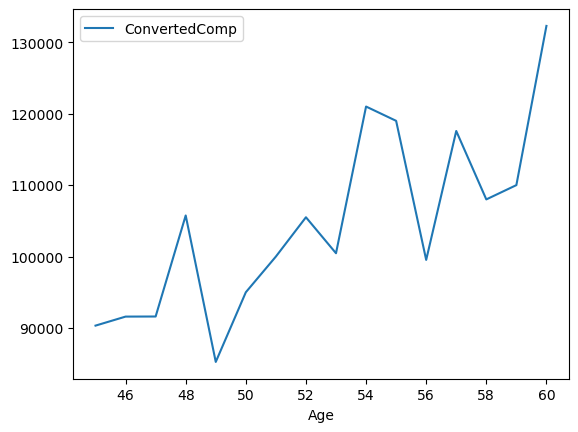

In [64]:
QUERY = """
SELECT Age, ConvertedComp
FROM master
Where Age Between 45 And 60
"""
df = pd.read_sql_query(QUERY,conn)
df = df.groupby(['Age'])[['ConvertedComp']].median()
df.plot(kind = 'line' )

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


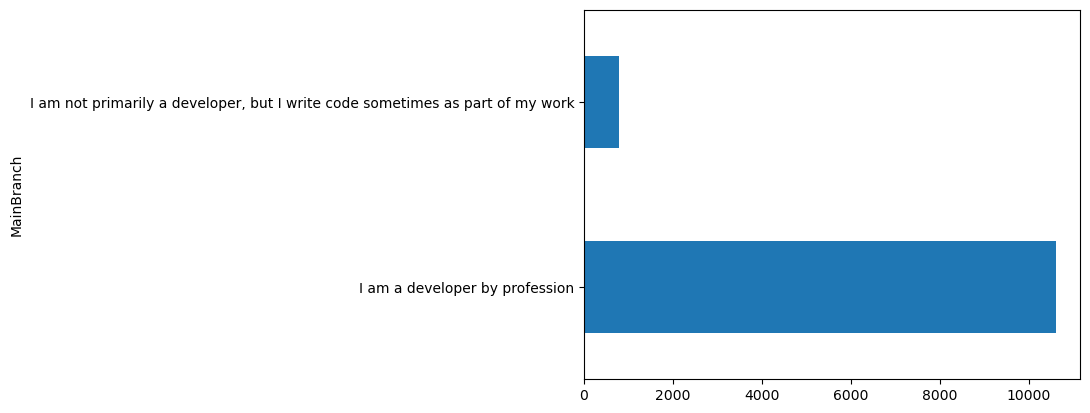

In [60]:
QUERY = """
SELECT MainBranch
FROM master

"""

df10 = pd.read_sql_query(QUERY,conn)
df11 = df10.groupby('MainBranch')['MainBranch'].count()
df11.plot(kind='barh')

plt.show()


Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
